# Задание
 Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. 

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#@title Энтропия

from functools import reduce
import math


entropy = lambda df:-reduce(
    lambda x,y:x+y,
    map(lambda x:(x/len(df))*math.log2(x/len(df)),
        df.iloc[:,-1].value_counts()))

entropy(df)

7.527082109018078

Разделим данные 

In [ ]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Дерево решений

Возьмем регрессор и обучим его, глубину возьмем небольшую, чтобы дерево было маленьким

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

И посмотрим наши фактические значения и предсказанные 

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_2

,Actual,Predicted
173,23.6,22.986782
274,32.4,22.986782
491,13.6,12.266129
72,22.8,22.986782
452,16.1,17.815385
...,...,...
441,17.1,12.266129
23,14.5,17.815385
225,50.0,45.627273
433,14.3,17.815385


In [ ]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.8251584424966962
0.7435711616336518


Так же посмотрим на ошибки

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.4432455671681645
Mean Squared Error: 19.10730653954883


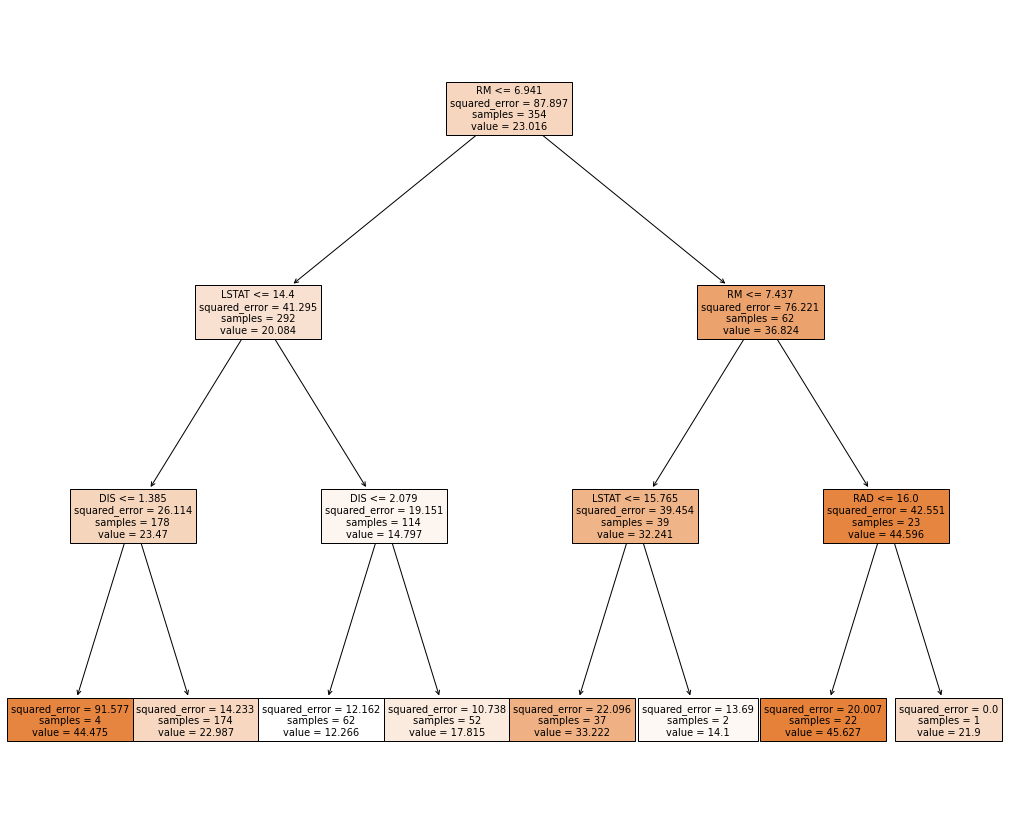

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(regressor, feature_names=boston.feature_names, filled=True)

([<matplotlib.axis.YTick at 0x7f759f06d4d0>,
 [Text(0, 0, 'CRIM'),
  Text(0, 0, 'ZN'),
  Text(0, 0, 'INDUS'),
  Text(0, 0, 'CHAS'),
  Text(0, 0, 'NOX'),
  Text(0, 0, 'RM'),
  Text(0, 0, 'AGE'),
  Text(0, 0, 'DIS'),
  Text(0, 0, 'RAD'),
  Text(0, 0, 'TAX'),
  Text(0, 0, 'PTRATIO'),
  Text(0, 0, 'B'),
  Text(0, 0, 'LSTAT')])

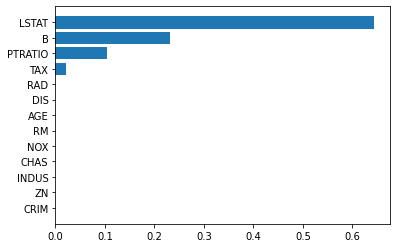

In [ ]:
plt.barh(np.arange(len(regressor.feature_importances_)), sorted(regressor.feature_importances_))
plt.yticks(np.arange(len(X.columns)),X.columns)

Модель переобучается

# Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted_y = reg.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_y))

In [ ]:
predicted_y = reg.predict(X_test)
df_3 = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_y})
df_3

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_y))

Нужно хорошо подготовить данные т.к модель дерева чувствительна к выбросам и переобучается. В линейной регресии модель тоже переобучается, но уже значительно меньше, при этом ошибок будет совершать больше